# Thi giữa kì Khoa Học Dữ Liệu

Tên: Võ Văn Thành

MSV: 102190190

[Dataset](https://www.kaggle.com/datasets/rankirsh/esports-earnings?select=GeneralEsportData.csv)


# Chung

Import thư viện


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.facecolor'] = 'white'


Load dataset

-   Với thuộc tính encoding là unicode escape (bỏ qua lỗi giải mã unicode)

-   Dataset nói về tiền thưởng của các giải đấu Esport từ năm 1998 đến năm 2021


In [2]:
data = pd.read_csv('GeneralEsportData.csv', encoding='unicode_escape')
data


,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120
3,Age of Empires IV,2021,Strategy,151091.75,217.00,248,79
4,Age of Empires Online,2011,Strategy,5356.56,775.00,25,17
...,...,...,...,...,...,...,...
553,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.00,170000.00,39,3
554,Knockout City,2021,Third-Person Shooter,0.00,0.00,0,0
555,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,100.00,0.00,6,1
556,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,48,2


Dataset bao gồm tên game, năm phát hành, thể loại, tổng số tiền thưởng trong các giải đấu, số tiền thưởng của các giải đấu trực tuyến, tổng số tuyển thủ và tổng số giải đấu.


In [3]:
data.dtypes


Game                 object
ReleaseDate           int64
Genre                object
TotalEarnings       float64
OnlineEarnings      float64
TotalPlayers          int64
TotalTournaments      int64
dtype: object

Chuyển kiểu dữ liệu của release date về kiểu chuỗi.


In [4]:
data["ReleaseDate"] = data['ReleaseDate'].astype(object)
data.dtypes


Game                 object
ReleaseDate          object
Genre                object
TotalEarnings       float64
OnlineEarnings      float64
TotalPlayers          int64
TotalTournaments      int64
dtype: object

# Bài 1

Viết chương trình cài đặt phương pháp Bootstrap để xuất ra phân bố lấy mẫu và dải tin cậy của một thông số thống kê của một biến (đặc trưng) nào đó của dataset với:

-   Biến (đặc trưng): do SV chọn từ dataset
-   Thông số thống kê: inter-quartile range (IQR)
-   Viết hàm có:
    -   Input parameters: n (Bootstrap sample size), M (number of bootstrap samplings), x (confidence interval in %)
    -   Return values: phân bố lấy mẫu (bằng histogram) và dải tin cậy của IQR của đặc trưng đã chọn


Chọn đặc trưng tổng số tiền thưởng của các giải đấu để phân tích, lọc bớt các game không có giải đấu.


In [5]:
sample = data[data.TotalTournaments != 0]["TotalEarnings"]
sample


0       191181.81
1      2296502.80
2        93913.65
3       151091.75
4         5356.56
          ...    
552    3087285.00
553     170000.00
555        100.00
556      50000.00
557      27250.00
Name: TotalEarnings, Length: 518, dtype: float64

Định nghĩa hàm tính IQR của sample.


In [6]:
def iqr(sample, bounds=[75, 25]):
    sample = np.array(sample)
    q3, q1 = np.percentile(sample, bounds)
    return q3 - q1


Tính IQR của đặc trưng đã chọn.


In [7]:
size = sample.count()
_iqr = iqr(sample)
print('Origin sample size: ' + str(size) + ' , sample IQR: ' + str(_iqr))


Origin sample size: 518 , sample IQR: 257747.26


Cài đặt phương pháp bootstrap.


In [8]:
def bootstrap(n, M, x=95):
    # Chọn ngẫu nhiên n mẫu từ sample M lần có hoàn lại
    bs = np.random.choice(sample, (M, n), replace=True)

    # Tính IQR của M tập dữ liệu n mẫu
    bs_iqrs = np.array([])
    for i in range(M):
        bs_iqrs = np.append(bs_iqrs, iqr(bs[i][:]))
    print(bs_iqrs)
    print("____________________________________________________")

    # So sánh IQR của sample với IQR trung bình của phương pháp bootstrap
    print('Sample IQR: ' + str(_iqr) +
          ", bootstrap mean IQR: " + str(bs_iqrs.mean()))
    print("____________________________________________________")

    # Tính khoảng tin cậy của IQR bootstrap
    alpha = 100 - x
    lower_confidence_interval, upper_confidence_interval = np.percentile(
        bs_iqrs, [alpha / 2, 100 - alpha / 2])
    print('Khoang tin cay: (' + str(lower_confidence_interval) +
          ', ' + str(upper_confidence_interval) + ')')

    # In đồ thị hist
    plt.figure(figsize=(10, 5))
    hp = sns.histplot(data=bs_iqrs, kde=True)
    hp.set_xlabel("Total Earnings")
    plt.axvline(lower_confidence_interval, color='red')
    plt.axvline(upper_confidence_interval, color='red')
    plt.show()


Tìm phân bố lấy mẫu và khoảng tin cậy của đặc trưng total earnings với số mẫu bootstrap là 100 và số lần lấy mẫu là 1000, mức độ tin cậy mặc định 95%.

[ 248514.2     431625.445   126900.2725  427632.91    117837.995
  188551.0425  106338.3875  205731.39    188527.9925  399019.9075
  625100.4     199356.365   696463.93    455351.99    225465.2975
  358847.195   459686.7425  280576.755   249963.605   247524.9325
  251841.6825  213308.165   201882.0225  408274.5075  300582.275
  381069.3775  246387.4525  231917.06    310146.34    297828.1
  167743.58    240809.4875  245242.99    227699.805   207873.68
  625118.905   411654.39    166341.325   194868.355   362498.4725
  259325.25    216903.115   410586.535    99576.35    477594.77
  247308.07    355193.9225  373007.7125  215400.29    766785.58
  338517.3025  206076.27    331812.4825  249664.3875  193481.285
  215689.3075  516793.385   313237.98    457980.585   491483.41
  202876.6725  186473.9     415214.0325  712448.81    431544.7675
  429553.6325  562239.46    428911.3275  193567.4     228013.36
  313545.6775  196729.1025  308251.5775  352227.065   258416.83
  182454.0875  438195.815   

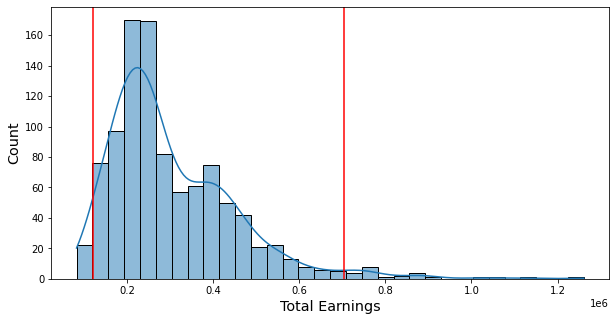

In [26]:
bootstrap(100, 1000)


# Bài 2

Dựa trên cùng dataset với Câu 1, viết chương trình xuất ra và thuyết trình các thống kê mô tả quan trọng của các biến, các mối quan hệ giữa các biến đã có và biến tạo thêm (nếu có), quy luật tiềm ẩn có thể suy diễn từ dataset nhờ các công cụ trực quan hoá dữ liệu (ví dụ: distribution plot, heat/cluster map, linear model plot,...).


In [10]:
data.describe()


,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
count,5.580000e+02,5.580000e+02,558.000000,558.000000
mean,2.064622e+06,1.515452e+06,200.926523,86.177419
std,1.484289e+07,1.233895e+07,861.633622,437.466932
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.027928e+03,0.000000e+00,5.000000,1.000000
50%,3.540318e+04,1.234000e+04,21.000000,5.000000
75%,2.205000e+05,1.394442e+05,103.000000,28.000000
max,2.791530e+08,2.555828e+08,14708.000000,6283.000000


Trung bình các game có số tiền thưởng là hơn 2tr$, hơn 200 tuyển thủ và hơn 86 giải đấu. Game có mức tiền thưởng giải đấu cao nhất lên tới gần 280tr $.

-   Biểu đồ nhiệt biểu diễn ma trận tương quan.


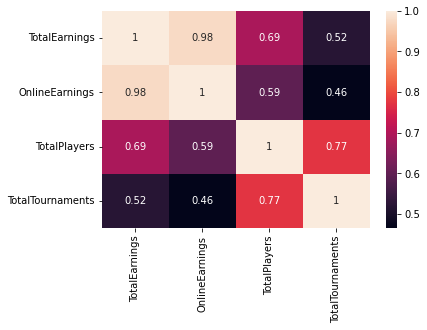

In [11]:
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

Qua bản đồ nhiệt biểu diễn ma trận tương quan, ta thấy nhóm các trường có tính tương quan cao với nhau như: tổng giải thưởng tỉ lệ thuận với giải thưởng của các giải đấu online, tổng số giải đấu tỉ lệ thuận với tổng số tuyển thủ thi đấu.

-   Vẽ biểu đồ biểu thị sự tương quan giữa online earnings và total earnings.

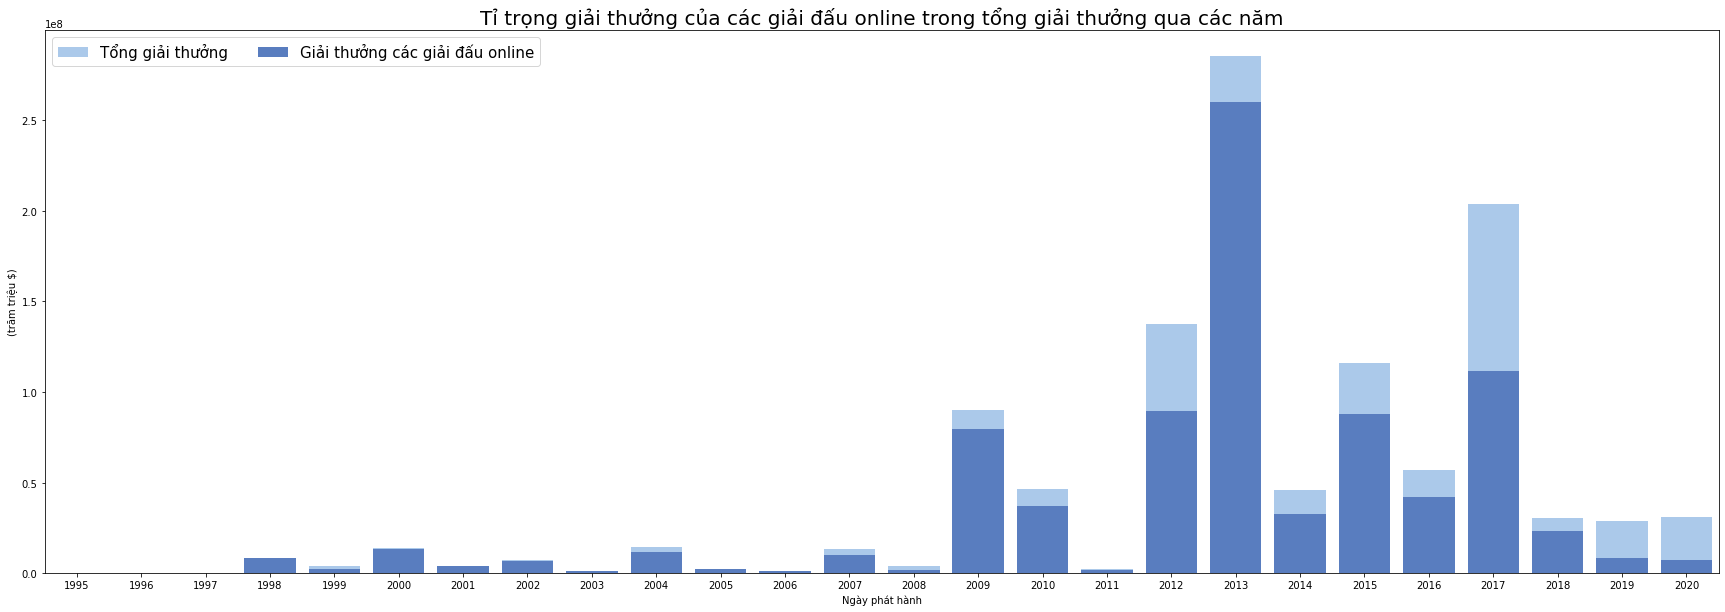

In [12]:
earnings = data[["ReleaseDate", "OnlineEarnings", "TotalEarnings"]].groupby(
    "ReleaseDate").agg({"TotalEarnings": np.sum, "OnlineEarnings": np.sum})
earnings = earnings[earnings.index > 1994]
earnings = earnings[earnings.index < 2021]

fig, ax = plt.subplots(figsize=(30, 10))
sns.set_color_codes("pastel")
sns.barplot(x=earnings.index, y=earnings.TotalEarnings, label="Tổng giải thưởng", color="b") # 
sns.set_color_codes("muted")
sns.barplot(x=earnings.index, y=earnings.OnlineEarnings, label="Giải thưởng các giải đấu online", color="b")
ax.legend(ncol=2, loc="upper left", frameon=True, fontsize=15)
ax.set(ylabel="(trăm triệu $)", xlabel="Ngày phát hành")
ax.set_title("Tỉ trọng giải thưởng của các giải đấu online trong tổng giải thưởng qua các năm", fontsize=20)
plt.show()


Qua biểu đồ, ta thấy online earnings chiếm phần lớn trong total earnings. Hai năm gần đây thì online earnings có xu hướng giảm tỉ trọng trong total earnings.

-   Biểu đồ các tựa game theo năm phát hành với số giải đấu và tổng tiền thưởng các giải đấu.

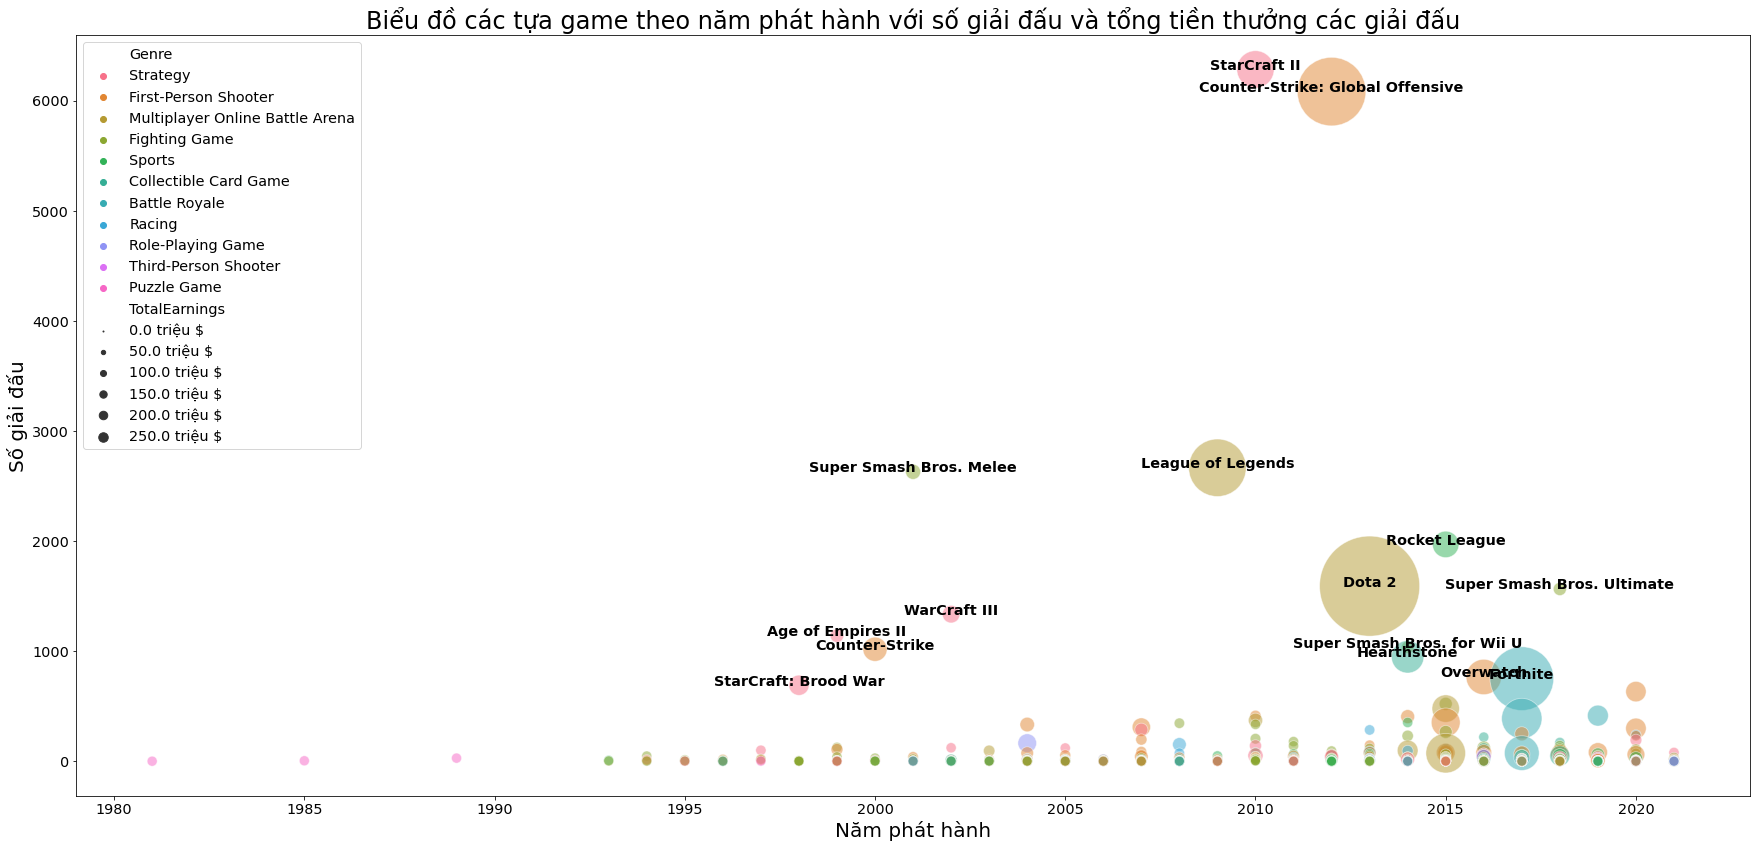

In [13]:
esport_counts = data[["Game", "TotalTournaments", "ReleaseDate",
                      "TotalEarnings", "Genre"]].groupby("Game").agg({"TotalTournaments": np.sum, "ReleaseDate": np.mean,
                                                                      "TotalEarnings": np.sum, "Genre": lambda x: x.value_counts().index[0]})
esport_counts.sort_values("TotalTournaments", ascending=False, inplace=True)
esport_counts.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(30, 14))
ax = sns.scatterplot(x="ReleaseDate", y="TotalTournaments", size="TotalEarnings",
                     hue="Genre", data=esport_counts, sizes=(100, 10000), alpha=.5)

most_tournamets = esport_counts.nlargest(15, "TotalTournaments")

for line in range(0, esport_counts.shape[0]):
    if esport_counts.Game[line] in list(most_tournamets.Game):
        ax.text(esport_counts.ReleaseDate[line], esport_counts.TotalTournaments[line], esport_counts.Game[line], horizontalalignment='center',
                size='x-large', color='black', weight='semibold')

# Chú thích
handles, labels = ax.get_legend_handles_labels()
to_skip = len(np.unique(esport_counts.Genre)) + 2
for h in handles[to_skip:]:
    sizes = [s / 100 for s in h.get_sizes()]
    label = h.get_label()
    label = str(float(label) * 100) + " triệu $"
    h.set_sizes(sizes)
    h.set_label(label)
plt.legend(loc=2, fontsize='x-large')
ax.set_xlabel("Năm phát hành", fontsize=20)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.set_ylabel("Số giải đấu", fontsize=20)
ax.yaxis.set_tick_params(labelsize='x-large')
plt.rc('axes', labelsize="x-large")
plt.title("Biểu đồ các tựa game theo năm phát hành với số giải đấu và tổng tiền thưởng các giải đấu", fontsize=24)
plt.show()


Từ biểu đồ ta thấy tựa game Dota 2 thuộc thể loại MOBA ra mắt năm 2013 là game có tổng giải thưởng cao nhất, start craft II là game có số lượng giải đấu nhiều nhất. Thời gian phát hành không ảnh hưởng đến tổng giải thưởng cũng như số lượng giải đấu được tổ chức.

-   Sắp xếp data để vẽ hai biểu đồ tiếp theo.


In [14]:
data_copy = data.copy()
data_copy.Game = data_copy.Game.str.split('\s[+0-9()\']').str[0]
data_copy.Game = data_copy.Game.str.split('[:]').str[0]
data_copy.replace("\sIII|\sII|\sIV|\sIX|\sVI|\sV|\sXIII|\sXII|\sXI|\sX|\sI|",
                  '', regex=True, inplace=True)
data_counts = data[["Game", "TotalTournaments", "ReleaseDate",
                    "TotalEarnings", "Genre"]].groupby("Game").agg({"TotalTournaments": np.sum, "ReleaseDate": lambda x: x,
                                                                    "TotalEarnings": np.sum, "Genre": lambda x: x.value_counts().index[0]})


-   Vẽ biểu đồ biểu diễn top 30 game có giải thưởng cao nhất.

C:\Users\Jay\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


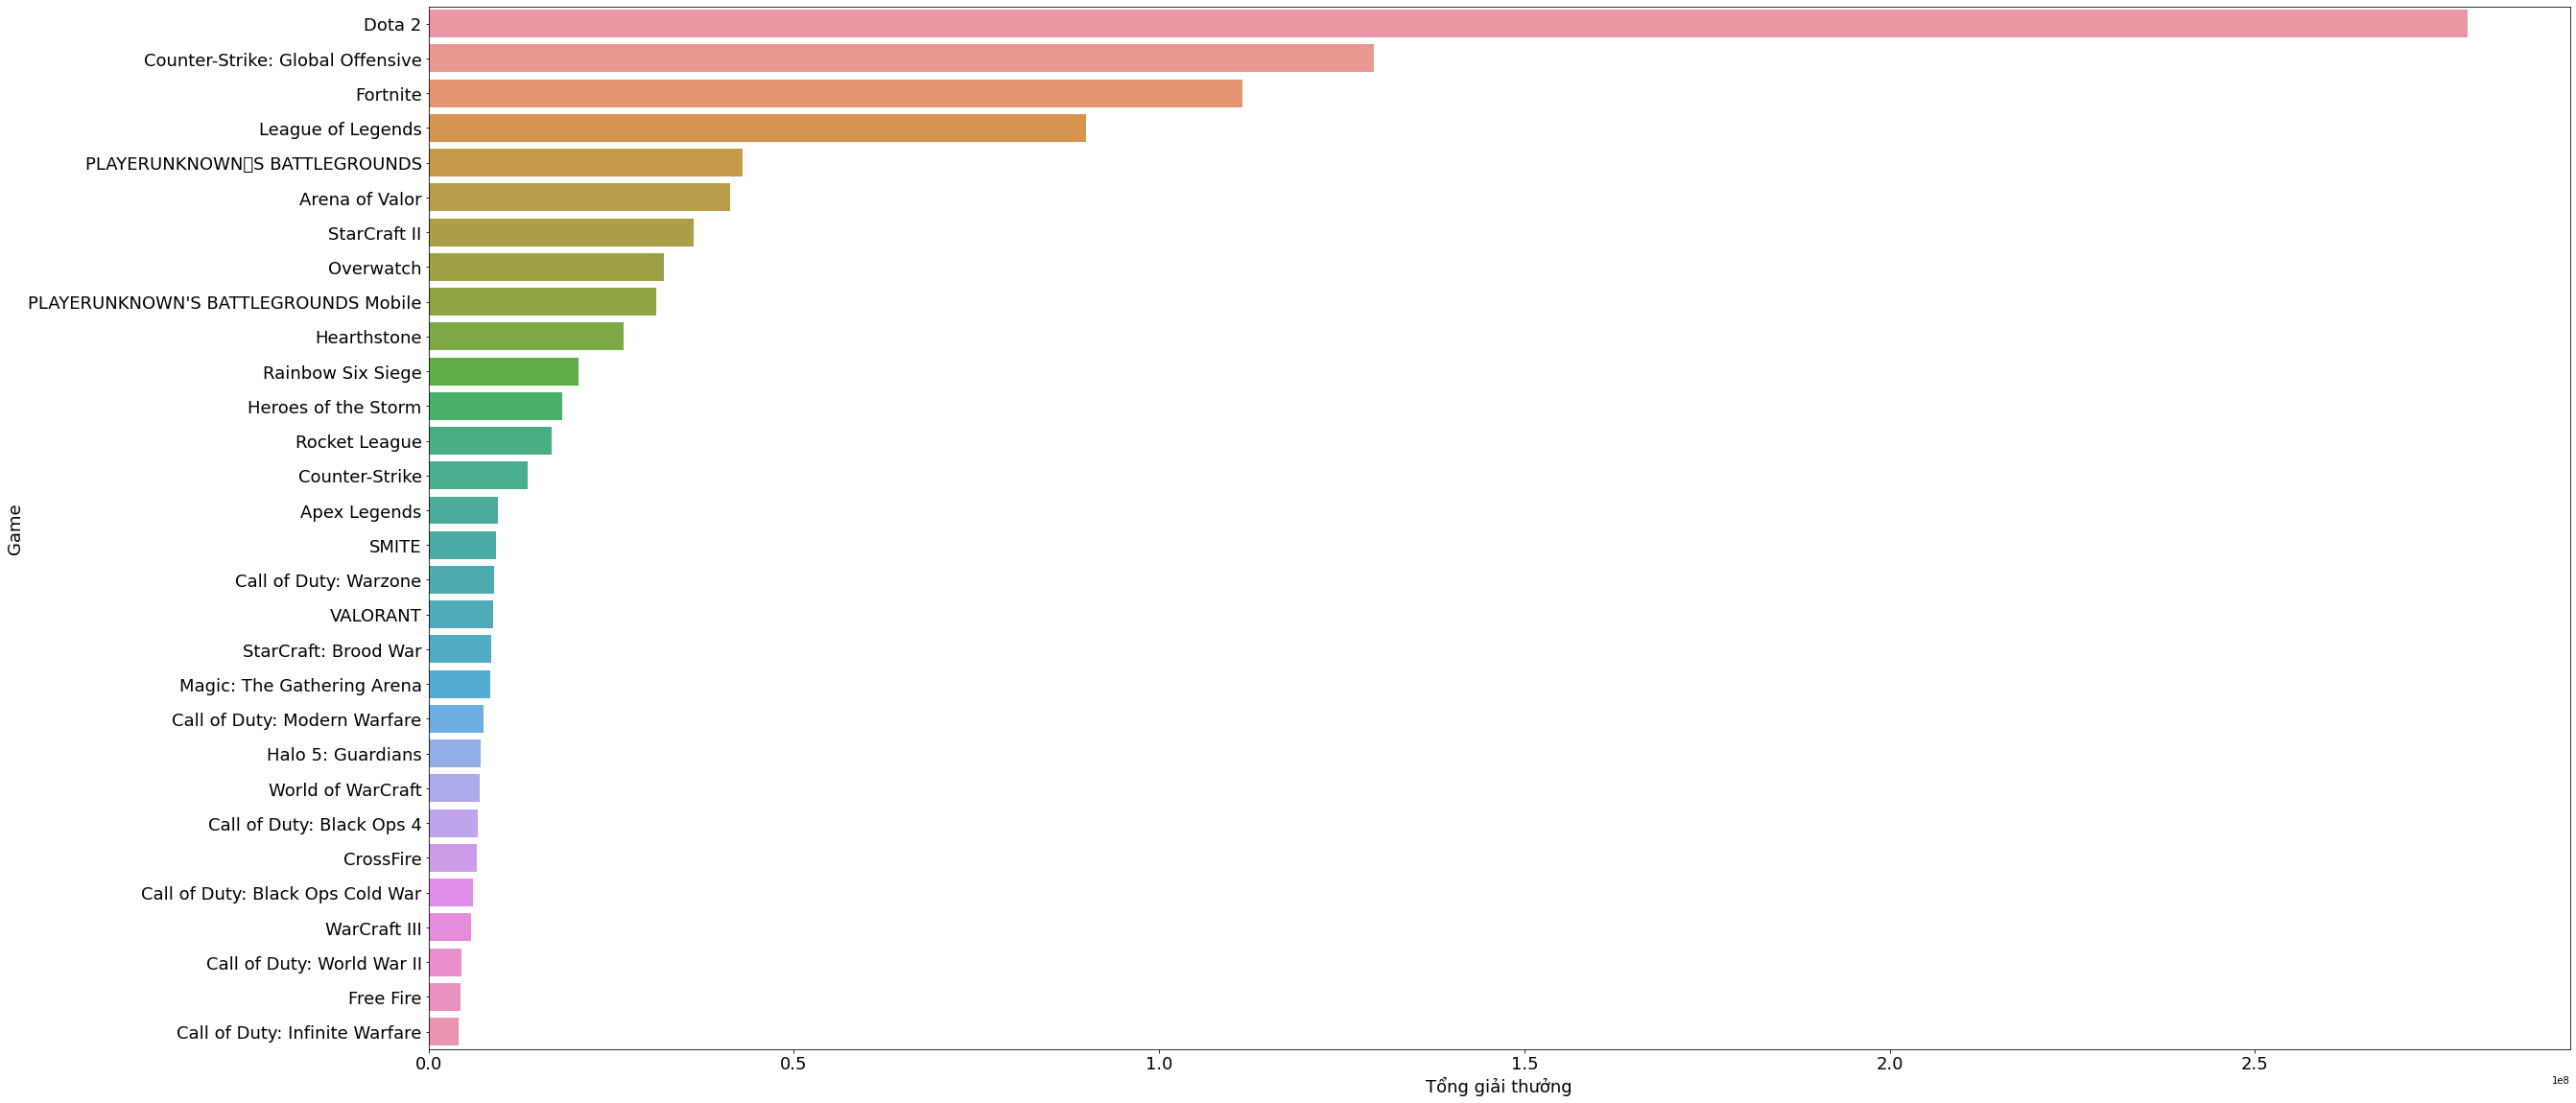

In [15]:
earnings = data_counts.nlargest(30, 'TotalEarnings')
earnings.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(40, 20))
sns.barplot(x=earnings.TotalEarnings, y=earnings.Game)
ax.set_xlabel("Tổng giải thưởng", fontsize=18)
ax.set_ylabel("Game", fontsize=18)
plt.setp(ax.get_yticklabels(), fontsize=18)
plt.setp(ax.get_xticklabels(), fontsize=18)
plt.show()


Biểu đồ cho thấy sự phân bố tổng giải thưởng của các giải đấu của top 30 game có tổng giải thưởng cao nhất. Từ đó, ta thấy được tổng giải thưởng tập trung ở một số game nhất định chứ không phân bố đều cho tất cả các tựa game.

-   Vẽ biểu đồ biểu diễn top 30 game có số lượng giải đấu nhiều nhất.

C:\Users\Jay\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


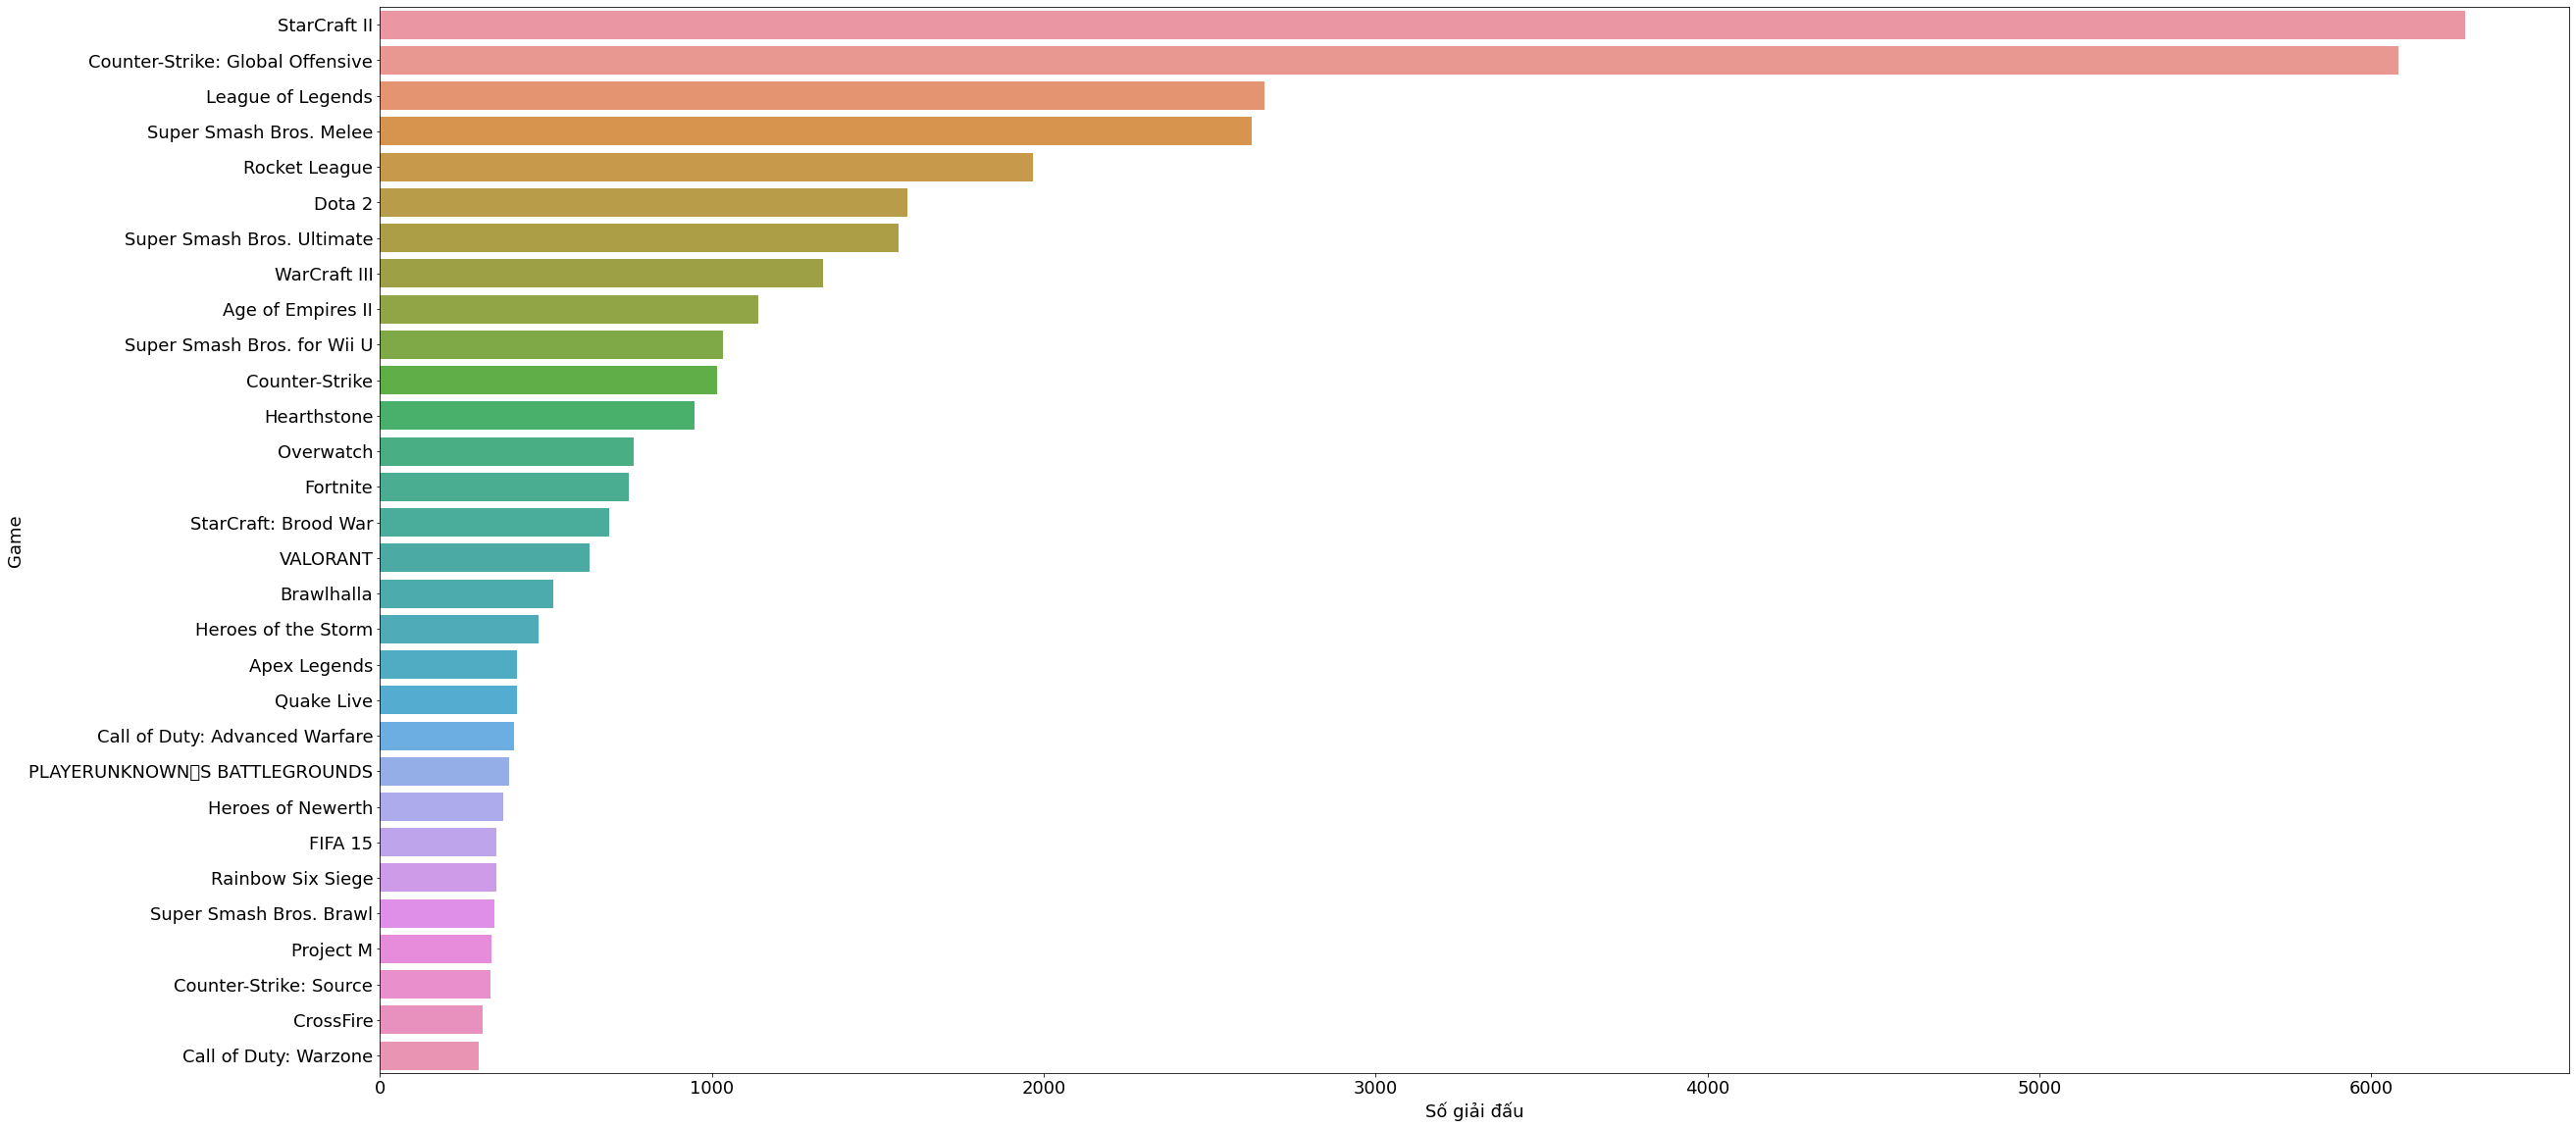

In [16]:
tournaments = data_counts.nlargest(30, 'TotalTournaments')
tournaments.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(40, 20))
sns.barplot(x=tournaments.TotalTournaments, y=tournaments.Game)
ax.set_xlabel("Số giải đấu", fontsize=18)
ax.set_ylabel("Game", fontsize=18)
plt.setp(ax.get_yticklabels(), fontsize=18)
plt.setp(ax.get_xticklabels(), fontsize=18)
plt.show()


-   Biểu đồ phân tích thể loại game dẫn đầu thị trường

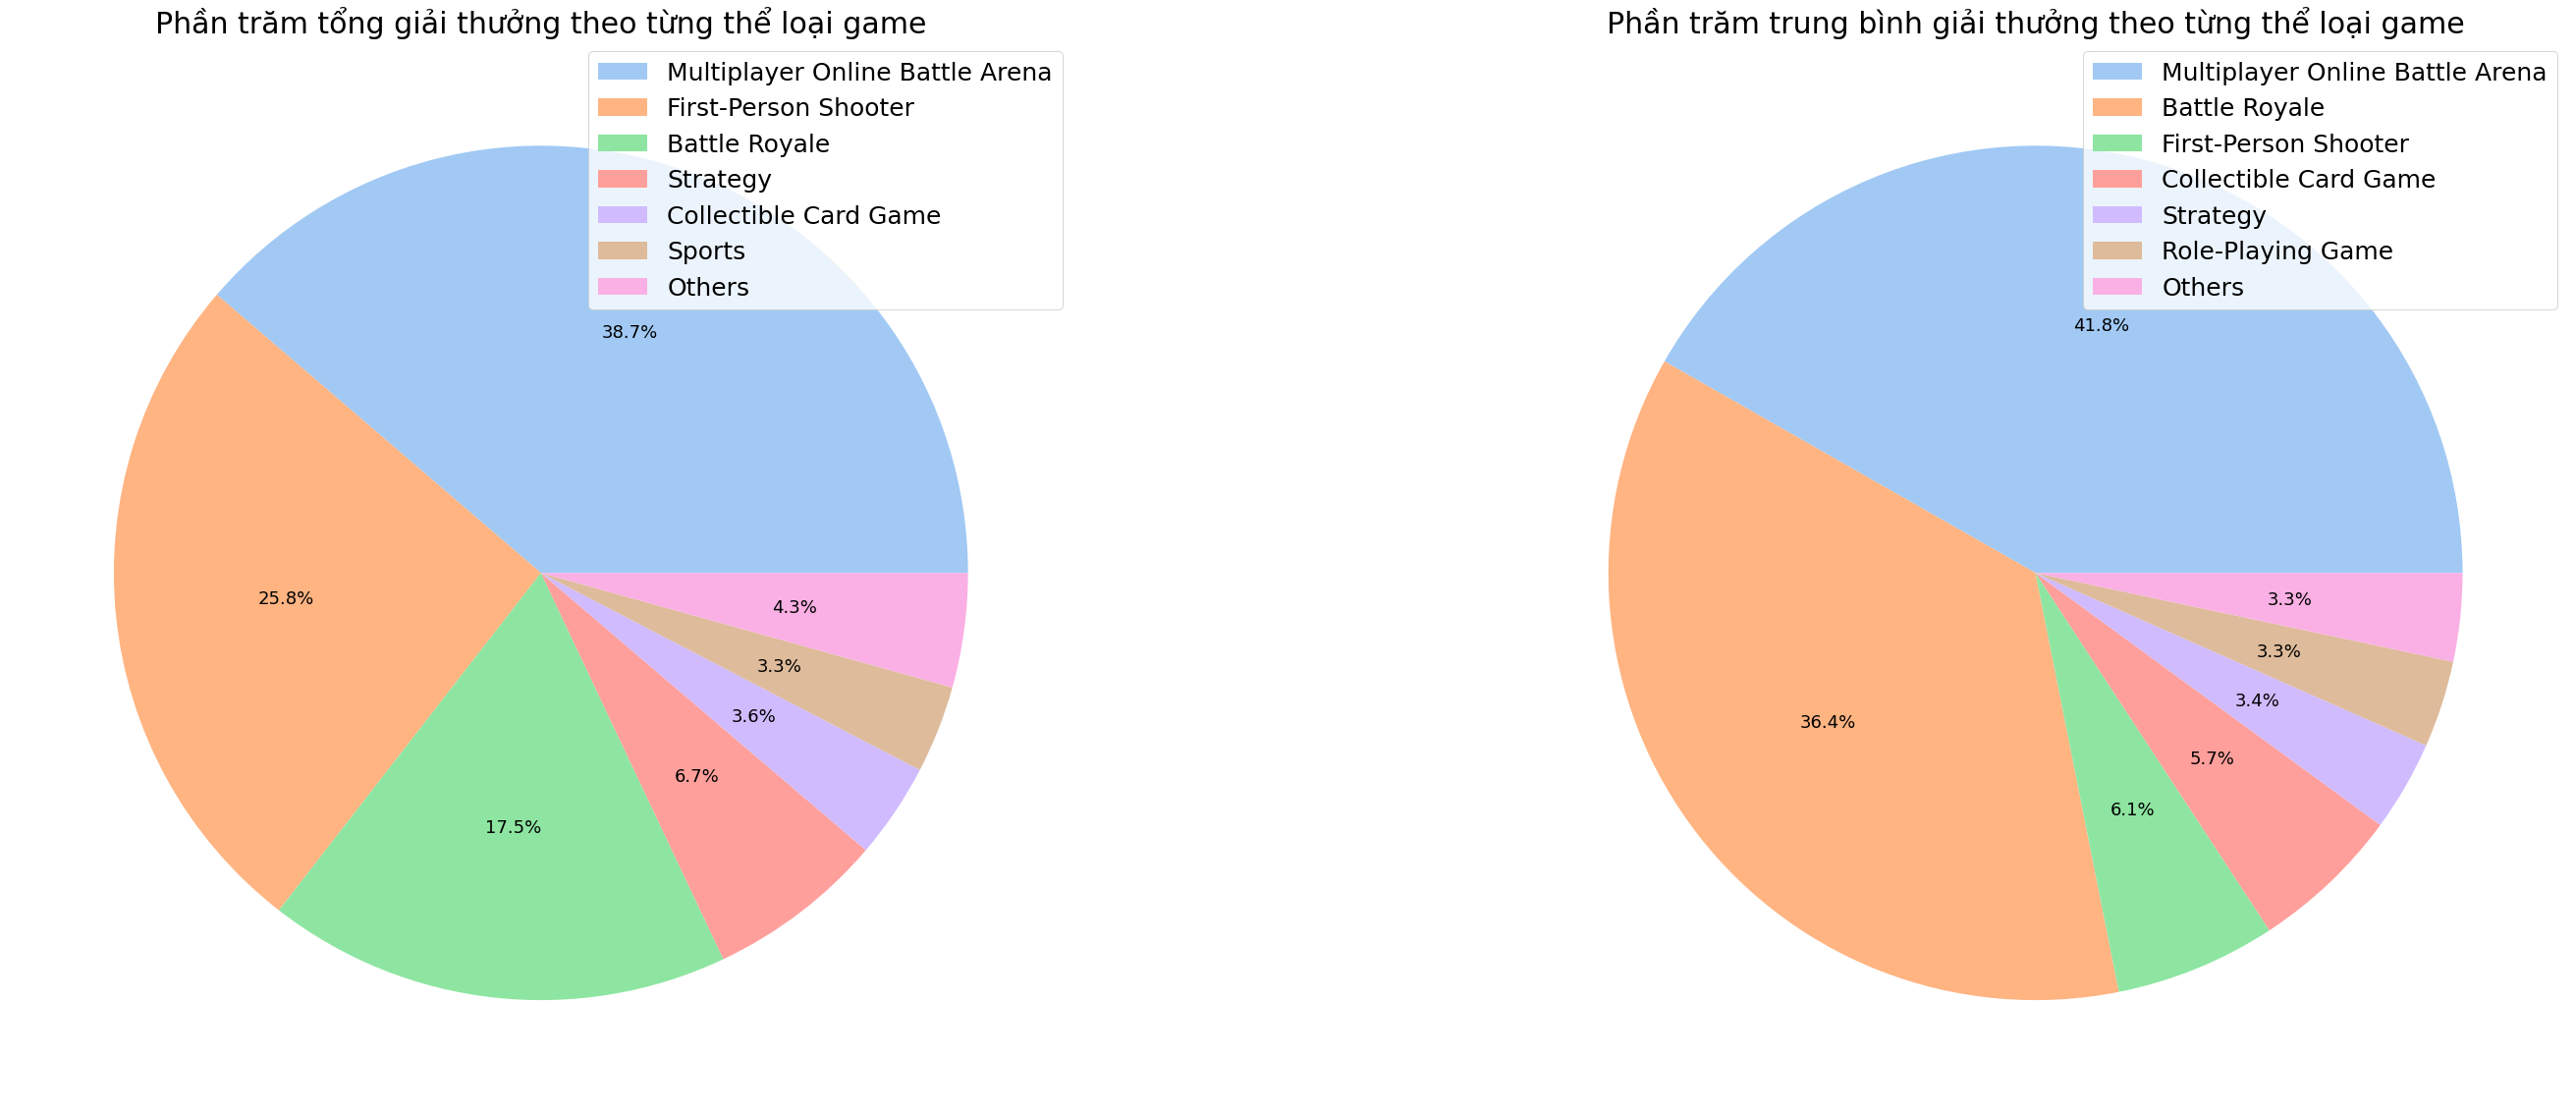

In [17]:
earning_per_genre = data_counts.groupby("Genre").agg(
    {'TotalEarnings': [np.sum, np.mean]})
total_earning = earning_per_genre.TotalEarnings['sum'].sort_values(ascending=False)
df = pd.DataFrame({'Genre': total_earning.index,
                  'TotalEarnings': total_earning.values})
total_earning = pd.concat([df[:6].copy(), pd.DataFrame(data={
    'Genre': ['Others'],
    'TotalEarnings': [df['TotalEarnings'][6:].sum()]
})])

mean_earning = earning_per_genre.TotalEarnings['mean'].sort_values(ascending=False)
df = pd.DataFrame({'Genre': mean_earning.index,
                  'MeanEarnings': mean_earning.values})
mean_earning = pd.concat([df[:6].copy(), pd.DataFrame(data={
    'Genre': ['Others'],
    'MeanEarnings': [df['MeanEarnings'][6:].sum()]
})])

fig, ax = plt.subplots(1, 2, figsize=(50, 20))
colors = sns.color_palette('pastel')
plt.subplot(1, 2, 1)
plt.pie(total_earning['TotalEarnings'], autopct='%.1f%%',
        colors=colors, textprops={'fontsize': 18})
plt.legend(total_earning.Genre, fontsize=25)
plt.title("Phần trăm tổng giải thưởng theo từng thể loại game", fontsize=30)

plt.subplot(1, 2, 2)
plt.pie(mean_earning['MeanEarnings'], autopct='%.1f%%', colors=colors, textprops={'fontsize': 18})
plt.legend(mean_earning.Genre, fontsize=25)
plt.title("Phần trăm trung bình giải thưởng theo từng thể loại game", fontsize=30)
plt.show()


Thể loại MOBA dẫn đầu ở cả hai chỉ số với 38.7% tổng giải thưởng và 41.8% ở trung bình tổng giải thưởng. Xếp thứ hai là battle royale với 36.4% trung bình tổng giải thưởng nhưng chỉ chiếm 17.5% tổng giải thưởng. Thể loại game bắn súng góc nhìn thứ nhất dù chiếm 25.8% tổng giải thưởng nhưng trung bình chỉ chiếm 6.1% nên chỉ được xếp ở vị trí thứ ba.

-   Biểu đồ biểu diễn tổng giải thưởng và số lượng của các giải đấu theo từng năm.

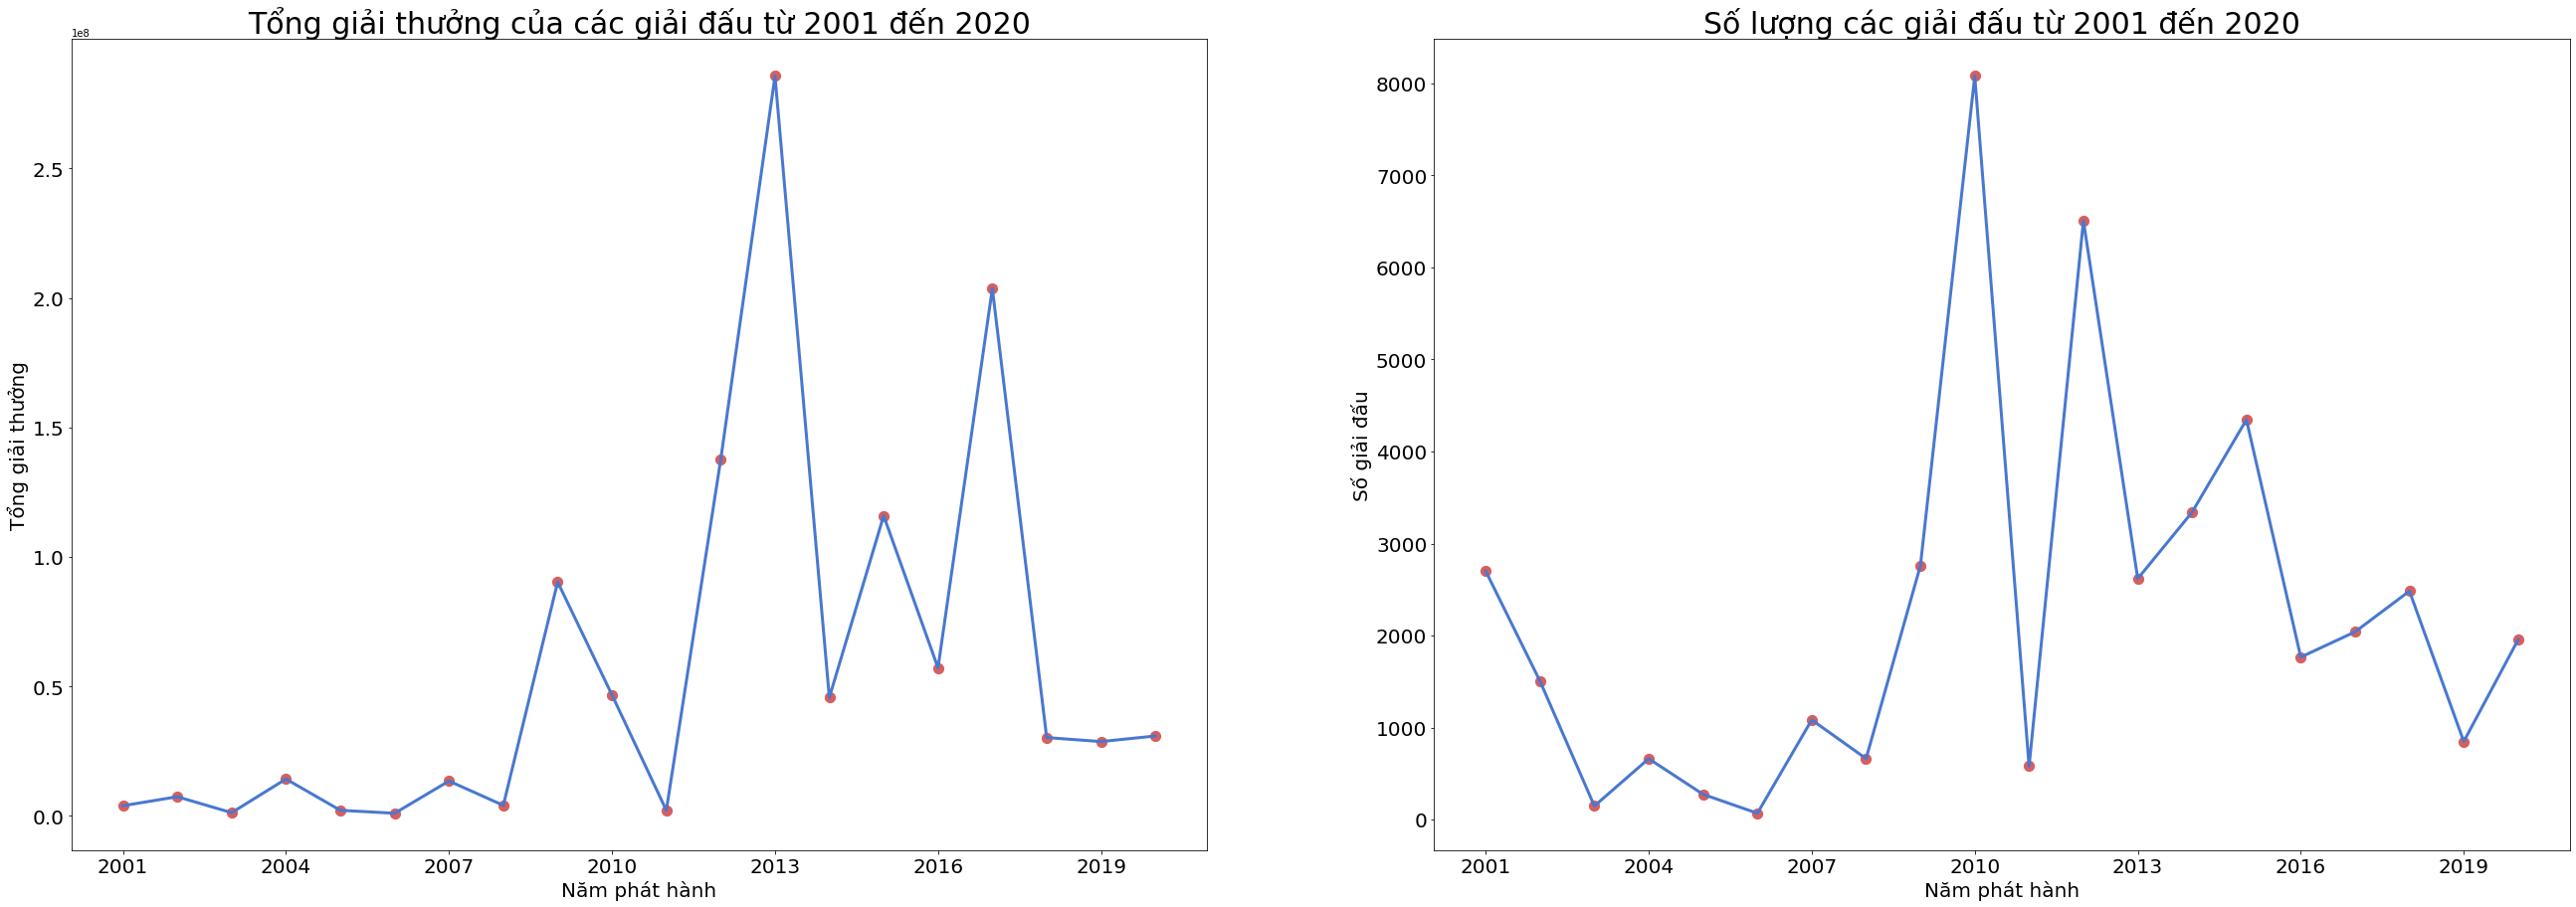

In [18]:
year = data[["TotalTournaments", "ReleaseDate", "TotalEarnings"]].groupby(
    "ReleaseDate").agg({"TotalEarnings": np.sum, "TotalTournaments": np.sum})
year = year[year.index < 2021]
year = year[year.index > 2000]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(45, 15))
ax1.set_title("Tổng giải thưởng của các giải đấu từ 2001 đến 2020", fontsize=30)
sns.lineplot(x=year.index, y=year.TotalEarnings, ax=ax1, linewidth=3, color='b')
sns.scatterplot(x=year.index, y=year.TotalEarnings, ax=ax1, s=150, color='r')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel("Năm phát hành", fontsize=20)
ax1.set_ylabel("Tổng giải thưởng", fontsize=20)
plt.setp(ax1.get_yticklabels(), fontsize=20)
plt.setp(ax1.get_xticklabels(), fontsize=20)

ax2.set_title("Số lượng các giải đấu từ 2001 đến 2020", fontsize=30)
sns.lineplot(x=year.index, y=year.TotalTournaments, ax=ax2, linewidth=3, color='b')
sns.scatterplot(x=year.index, y=year.TotalTournaments, ax=ax2, s=150, color='r')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_xlabel("Năm phát hành", fontsize=20)
ax2.set_ylabel("Số giải đấu", fontsize=20)
plt.setp(ax2.get_yticklabels(), fontsize=20)
plt.setp(ax2.get_xticklabels(), fontsize=20)
plt.show()


Tổng giải thưởng và số lượng giải đấu có sự tăng trưởng nhưng không đều qua các năm. 2010 là năm có số lượng giải đấu cao nhất, 2013 là năm có tổng số tiền thưởng giải đấu cao nhất.

# Nhận xét

-   Tiền thưởng của các giải đấu Esport tập trung ở một số game nhất định, điều này ít xảy ra hơn đối với số lượng giải đấu.
-   Dota 2 là game có tổng số tiền thưởng cao nhất, StarCraft II là game có nhiều giải đấu được tổ chức nhất. 
-   Thể loại Multiplayer Online Battle Arena (MOBA) và Battle Royale đang dẫn đầu ngành công nghiệp game. 
-   Qua dataset này, ta thấy được Esport vẫn đang trên đà phát triển và sẽ rất thú vị để xem nó sẽ phát triển như thế nào trong vài năm tới.

![Alt text](https://www.howtogeek.com/wp-content/uploads/2019/12/GG-Banner.jpg "a title")
